# Reconocimiento de notas musicales con KNN

# Preparacion de señales


#### Para estimar el pitch de una señal de entrada realmente no necesitamos un vector de características especialmente grande , de hecho, solo necesitamos la característica de su pitch. El pitch no deja de ser , para sonidos no ruidosos , el primer y el más intenso armónico ; por lo que debemos conseguir extraerlo adecuadamente y posteriormente compararlo con un pitch asignado a cada nota. Para ello: 

#### 1) Realizamos la DFT 
#### 2) Obtenemos la frecuencia del primer pico

## Preparacion de señales

el pitch esta en una frecuencia aproximada de: 440.5895233154297


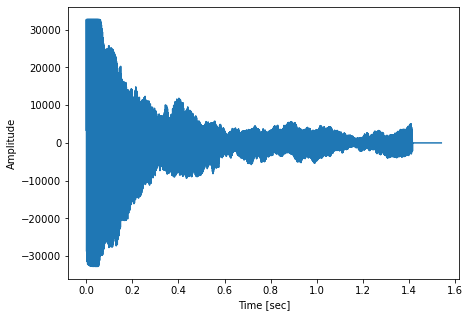

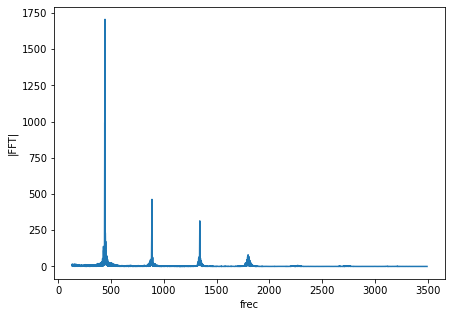

In [533]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import scipy.signal as sig
import numpy as np
import sys
import tds_utils


#Se carga la señal
fs,s = waves.read('sonidos_test/a_piano.wav')
s_left = s[ :,0]  #Separamos el canal izquierdo
s_right = s[ :,1] #Separamos el canal derecho
t = (np.arange(np.shape(s)[0])-1)/fs

#Representamos la señal en el dominio temporal
plt.figure(figsize =(7,5))
plt.plot(t, s_left)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude') 

#Se hace la transformada de fourier
psd,f = tds_utils.my_spectra(s_left,fs)
idx = f>=130 #original 0
f= f[idx]
psd = psd[idx]

#Representamos la señal en el dominio frecuencial

plt.figure(figsize =(7,5))
plt.plot(f[:20000],psd[:20000])
plt.xlabel('frec')
plt.ylabel('|FFT|') 

#Sacamos el primer pico --> Estará situado en la frecuencia fundamental
pitch_index = sig.find_peaks(psd, height= (np.max(psd)/2))                        
pitch = f[pitch_index[0]]


print("el pitch esta en una frecuencia aproximada de: " + str(pitch[0]))

#### El codigo anterior lo metemos en una funcion para poder automatizarlo (ademas de otra funcion para codificar las notas)

In [534]:
import matplotlib.pyplot as plt    #Introducimos 
import scipy.io.wavfile as waves
import scipy.signal as sig
import numpy as np
import sys
import os
#sys.path.append('../') #allows to import a module in a diff folder
import tds_utils

def pitch_extract(s ,fs,feedback=True, ): #Se le mete la señal stereo y su frecuencia de muestreo

    s_left = s[ :,0] #Nos quedamos con el canal izquierdo
    t = (np.arange(np.shape(s)[0])-1)/fs

#Se hace la transformada de fourier
    psd,f = tds_utils.my_spectra(s_left,fs)
    idx = f>=130 
    f= f[idx]
    psd = psd[idx]

#Sacamos el primer pico --> Estará situado en la frecuencia fundamental

    pitch_index = sig.find_peaks(psd[0:-1], height= (np.max(psd)/2))
    pitch = f[pitch_index[0]]
   
    try:   #Esta funcion sirve para mostrar por pantalla el pitch , por defecto esta desctivado
        if feedback == True:
            print("el pitch esta en una frecuencia aproximada de: " + str(pitch[0]))
            
        if len(pitch) == 0:
            pitch = [0]

        return pitch[0]
    
    except:
        pitch = [0]
        return pitch[0]

#### Codificacion de notas:  asignar a cada nota un valor numerico y viceversa

In [535]:
#Funcion que nos permite asingar valores numericos a notas, ejemplo do=0

def codif_note(note):
    if note == "c":
        return 0
    
    elif note == "c#":
        return 1
    
    elif note == "d":
        return 2
    
    elif note == "d#":
        return 3
    
    elif note == "e":
        return 4
    
    elif note == "f":
        return 5
    
    elif note == "f#":
        return 6
    
    elif note == "g":
        return 7
    
    elif note == "g#":
        return 8
    
    elif note == "a":
        return 9
    
    elif note == "a#":
        return 10
    
    elif note == "b":
        return 11
    
    else:
        return 12
    
    
#Funcion que nos permite decodificar los valores numericos en notas , ejemplo 0=do

def decodif_value(value):

    if value == 0:
        return "c"
    
    elif value == 1:
        return "c#"
    
    elif value == 2:
        return "d"
    
    elif value == 3:
        return "d#"
    
    elif value == 4:
        return "e"
    
    elif value == 5:
        return "f"
    
    elif value == 6:
        return "f#"
    
    elif value == 7:
        return "g"
    
    elif value == 8:
        return "g#"
    
    elif value == 9:
        return "a"
    
    elif value == 10:
        return "a#"
    
    elif value == 11:
        return "b"
    
    else:
        return "Error"

## Etapa de Aprendizaje

a#_3.wav : 10
el pitch esta en una frecuencia aproximada de: 233.16421508789062
a#_3_bass.wav : 10
el pitch esta en una frecuencia aproximada de: 232.49130249023438
a#_3_belltrain.wav : 10
el pitch esta en una frecuencia aproximada de: 232.49130249023438
a#_3_guitar.wav : 10
el pitch esta en una frecuencia aproximada de: 233.16421508789062
a#_4.wav : 10
el pitch esta en una frecuencia aproximada de: 466.1602020263672
a#_4_bass.wav : 10
el pitch esta en una frecuencia aproximada de: 464.98260498046875
a#_4_belltrain.wav : 10
el pitch esta en una frecuencia aproximada de: 466.32843017578125
a#_4_guitar.wav : 10
el pitch esta en una frecuencia aproximada de: 462.1227264404297
a#_5.wav : 10
el pitch esta en una frecuencia aproximada de: 932.3204040527344
a#_5_bass.wav : 10
el pitch esta en una frecuencia aproximada de: 929.9652099609375
a#_5_belltrain.wav : 10
el pitch esta en una frecuencia aproximada de: 930.9745788574219
a#_5_guitar.wav : 10
el pitch esta en una frecuencia aproximada de

el pitch esta en una frecuencia aproximada de: 738.3533477783203
f#_5_guitar.wav : 6
el pitch esta en una frecuencia aproximada de: 739.0262603759766
f_3.wav : 5
el pitch esta en una frecuencia aproximada de: 174.62081909179688
f_3_bass.wav : 5
el pitch esta en una frecuencia aproximada de: 174.1161346435547
f_3_belltrain.wav : 5
el pitch esta en una frecuencia aproximada de: 174.78904724121094
f_3_guitar.wav : 5
el pitch esta en una frecuencia aproximada de: 174.78904724121094
f_4.wav : 5
el pitch esta en una frecuencia aproximada de: 349.24163818359375
f_4_bass.wav : 5
el pitch esta en una frecuencia aproximada de: 348.40049743652344
f_4_belltrain.wav : 5
el pitch esta en una frecuencia aproximada de: 348.9051818847656
f_4_guitar.wav : 5
el pitch esta en una frecuencia aproximada de: 349.24163818359375
f_5.wav : 5
el pitch esta en una frecuencia aproximada de: 698.4832763671875
f_5_bass.wav : 5
el pitch esta en una frecuencia aproximada de: 696.6327667236328
f_5_belltrain.wav : 5
el 

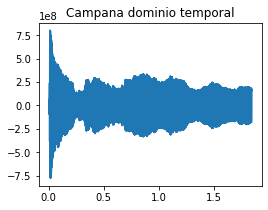

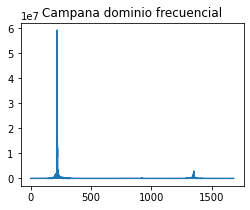

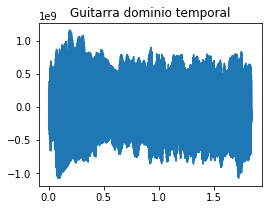

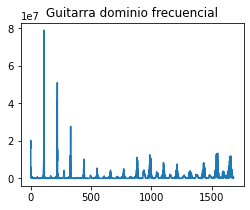

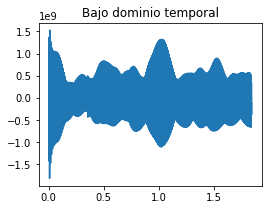

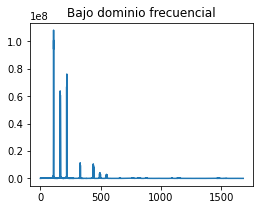

In [536]:
from sklearn.neighbors import KNeighborsClassifier

#Configuramos el modelo
x_train = []
y_train = []
k = 2 #El valor de k va de la mano de como se realice el entrenamiento como se explica en la memoria.
model_KNN = KNeighborsClassifier(k) #Se realiza el modelo

#Preparamos la entrada de datos de entrenamiento --> x_train = [f1,f2,f3...] , y_train = [do,do#,re,etc...]
dir = os.listdir('sonidos_entrenamiento') #acedemos al directorio donde estan los archivos
for i in dir:
    print(str(i) + " : " + str(codif_note(i[0:i.find("_")])) )
    y_train.append(codif_note(i[0:i.find("_")]))
    fs_prepare,s_prepare = waves.read('sonidos_entrenamiento/'+ i)
    x_train.append(float(pitch_extract(s_prepare,fs_prepare)))
    
#Entrenamos el modelo
model_KNN.fit(np.array(x_train).reshape(-1, 1), y_train)


#Las tres rondas de sonidos utilizados serían del siguiente estilo --> Se represental al final de la lista

#Campana
e_fs ,example  = waves.read('sonidos_entrenamiento/a_4_belltrain.wav')
psd_ex,f_ex = tds_utils.my_spectra(example,e_fs)
t_ex = (np.arange(np.shape(example[ :,0])[0])-1)/e_fs
idx = f_ex >=0 
f_ex = f_ex[idx]
psd_ex = psd_ex[idx]
plt.figure(figsize=(4, 3))
plt.title("Campana dominio temporal")
plt.plot(t_ex,example[ :,0])
plt.figure(figsize=(4, 3))
plt.title("Campana dominio frecuencial")
plt.plot(f_ex[:20000],psd_ex[:20000])


#Guitarra
e_fs ,example  = waves.read('sonidos_entrenamiento/a_3_guitar.wav')
psd_ex,f_ex = tds_utils.my_spectra(example,e_fs)
t_ex = (np.arange(np.shape(example[ :,0])[0])-1)/e_fs
idx = f_ex >=0 
f_ex = f_ex[idx]
psd_ex = psd_ex[idx]
plt.figure(figsize=(4, 3))
plt.title("Guitarra dominio temporal")
plt.plot(t_ex,example[ :,0])
plt.figure(figsize=(4, 3))
plt.title("Guitarra dominio frecuencial")
plt.plot(f_ex[:20000],psd_ex[:20000])


#Bajo
e_fs ,example  = waves.read('sonidos_entrenamiento/a_3_bass.wav')
psd_ex,f_ex = tds_utils.my_spectra(example,e_fs)
t_ex = (np.arange(np.shape(example[ :,0])[0])-1)/e_fs
idx = f_ex >=0 
f_ex = f_ex[idx]
psd_ex = psd_ex[idx]
plt.figure(figsize=(4, 3))
plt.title("Bajo dominio temporal")
plt.plot(t_ex,example[ :,0])
plt.figure(figsize=(4, 3))
plt.title("Bajo dominio frecuencial")
plt.plot(f_ex[:20000],psd_ex[:20000])



# Uso final (Test)

#### Visualizacion de sample a sample


In [538]:
x_test = []
#Una vez entrenado el modelo, preparamos un vector con entradas verdaderas para ver como lo realiza
dir = os.listdir('sonidos_test') #Se accede al directorio
for i in dir:
    fs_prepare,s_prepare = waves.read('sonidos_test/'+ i)
    x_test = [pitch_extract(s_prepare,fs_prepare,False)]
    #Se predice la salida
    pred = model_KNN.predict(np.array(x_test).reshape(1, -1))
    
    print("Se introdujo: " + i + "-- Pitch: " + decodif_value(pred))




Se introdujo: a#_3_bass.wav-- Pitch: a#
Se introdujo: a#_3_basstest.wav-- Pitch: a#
Se introdujo: a#_4_piano.wav-- Pitch: a#
Se introdujo: a#_5_piano.wav-- Pitch: a#
Se introdujo: a#_piano.wav-- Pitch: a#
Se introdujo: a_3_bass.wav-- Pitch: a
Se introdujo: a_3_basstest.wav-- Pitch: a
Se introdujo: a_4_piano.wav-- Pitch: a
Se introdujo: a_5_piano.wav-- Pitch: a
Se introdujo: a_piano.wav-- Pitch: a
Se introdujo: a_serum.wav-- Pitch: a
Se introdujo: b_3_bass.wav-- Pitch: b
Se introdujo: b_3_basstest.wav-- Pitch: b
Se introdujo: b_4_piano.wav-- Pitch: b
Se introdujo: b_5_piano.wav-- Pitch: b
Se introdujo: b_piano.wav-- Pitch: b
Se introdujo: c#_3_bass.wav-- Pitch: c#
Se introdujo: c#_3_basstest.wav-- Pitch: c#
Se introdujo: c#_4_piano.wav-- Pitch: c#
Se introdujo: c#_5_piano.wav-- Pitch: c#
Se introdujo: c#_piano.wav-- Pitch: c#
Se introdujo: c_3_bass.wav-- Pitch: c
Se introdujo: c_3_basstest.wav-- Pitch: c
Se introdujo: c_4_piano.wav-- Pitch: c
Se introdujo: c_5_piano.wav-- Pitch: c
Se in

#### Visualizacion del total

In [540]:
x_test = [] 
y_hat_KNN = [] #Este array se cargará extrayendo del nombre de la muestra de prueba la nota
                #Todos los sonidos se guardan con el nombre "nota_octava_instrumento"
dir = os.listdir('sonidos_test')
for i in dir: #Se accede al directorio para cargar las muestras de prueba
    fs_prepare,s_prepare = waves.read('sonidos_test/'+ i)
    y_hat_KNN.append(codif_note(i[0:i.find("_")]))
    x_test.append(pitch_extract(s_prepare,fs_prepare,False))
    #Se predice la salida
    
y_test = model_KNN.predict(np.array(x_test).reshape(-1, 1)) #Se estima la nota


#accuracy
acc = np.mean(y_hat_KNN == y_test) #Se calcula la precision del modelo

print("Precision del: " + str(acc * 100.0) +"%" )



Precision del: 100.0%
